# **DS2500 - Exploratory Data Analysis**

Prof. Marina Kogan

Minh Le

In Module Assignment 6, I will redo Module Assignment 1.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.stats import ttest_ind


# 1. Formula your question

"How well do vote counts correlate with other measures of popularity like ratings of the series?"

# 2. Read in your data

In [ ]:
# From https://github.com/harsh1399/DS2500-Data_Wrangling.git

movies_df = pd.read_csv('https://raw.githubusercontent.com/harsh1399/DS2500-Data_Wrangling/main/Module_Assignment-1/IMDB_TV_dataset/TV%20Series%20Names%20with%201k%20Votes.csv', encoding='latin1')

# 3. Check the packaging

In [ ]:
movies_df.shape

(6679, 7)

# 4. Look at the top and bottom of data

In [ ]:
movies_df.head()

,tconst,primaryTitle,genres,numVotes,averageRating,startYear,SeriesName
0,tt0040053,The Ed Sullivan Show,"Comedy,Music",1124,7.8,1948.0,The Ed Sullivan Show (1948)
1,tt0041038,The Lone Ranger,Western,2064,7.8,1949.0,The Lone Ranger (1949)
2,tt0042111,The George Burns and Gracie Allen Show,Comedy,1181,8.4,1950.0,The George Burns and Gracie Allen Show (1950)
3,tt0042114,The Honeymooners,"Comedy,Family",4676,8.6,1955.0,The Honeymooners (1955)
4,tt0042116,The Jack Benny Program,Comedy,1231,8.4,1950.0,The Jack Benny Program (1950)


In [ ]:
movies_df.tail()

,tconst,primaryTitle,genres,numVotes,averageRating,startYear,SeriesName
6674,tt9879074,The Disappearance of Madeleine McCann,"Crime,Documentary",8364,6.6,2019.0,The Disappearance of Madeleine McCann (2019)
6675,tt9894488,Foodie Love,Drama,1181,7.8,2019.0,Foodie Love (2019)
6676,tt9899340,Her Private Life,"Comedy,Romance",1657,7.7,2019.0,Her Private Life (2019)
6677,tt9900092,Motherland: Fort Salem,"Drama,Fantasy,Sci-Fi",6919,7.1,2020.0,Motherland: Fort Salem (2020)
6678,tt9908860,Blown Away,Reality-TV,1748,7.0,2019.0,Blown Away (2019)


# 5. Check the "n" s

The rating for episodes is a float type and it ranges from 1 to 10 (IMDb rating scale)

In [ ]:
movies_df['averageRating'].head()

0    7.8
1    7.8
2    8.4
3    8.6
4    8.4
Name: averageRating, dtype: float64

The number of votes should be greater than 1000

In [ ]:
movies_df['numVotes'].head()

0    1124
1    2064
2    1181
3    4676
4    1231
Name: numVotes, dtype: int64

There should be around 6000 movie series

In [ ]:
len(movies_df['SeriesName'].unique())

6672

# 6. Validate against external knowledge

What is the highest rating that IMDb rates the movies?

In [ ]:
movies_df['averageRating'].max()

9.9

What is the lowest rating that IMDb rates the movies?

In [ ]:
movies_df['averageRating'].min()

1.0

What is the highest votes within the dataset?

In [ ]:
movies_df['numVotes'].max()

1760872

What movies received the highest vote?

In [ ]:
highest_movie_df = movies_df[['SeriesName','numVotes']]

result = highest_movie_df[highest_movie_df['numVotes'] == 1760872]
print(result)

                  SeriesName  numVotes
2543  Game of Thrones (2011)   1760872


What is the lowest votes within the dataset?

In [ ]:
movies_df['numVotes'].min()

1001

What movies that received the lowest vote?

In [ ]:
lowest_movie_df = movies_df[['SeriesName','numVotes']]

result = lowest_movie_df[lowest_movie_df['numVotes'] == 1001]
print(result)

                        SeriesName  numVotes
1145    Vengeance Unlimited (1998)      1001
1172             Robot Wars (1998)      1001
3225  Steven Seagal: Lawman (2009)      1001
3830                 Gosick (2011)      1001


What are the most common genres?

In [ ]:
common_genres_df = movies_df['genres'].value_counts().head(10)

Comedy                        756
Drama                         344
Action,Adventure,Animation    344
Crime,Drama,Mystery           319
Comedy,Drama                  186
Action,Crime,Drama            142
Drama,Romance                 141
Adventure,Animation,Comedy    138
Documentary                   138
Reality-TV                    133
Name: genres, dtype: int64

What is the sum of all ratings for TV series?

In [ ]:
movies_df['averageRating'].value_counts().sum()

6679

# 7. Make a plot

<Axes: xlabel='numVotes', ylabel='averageRating'>

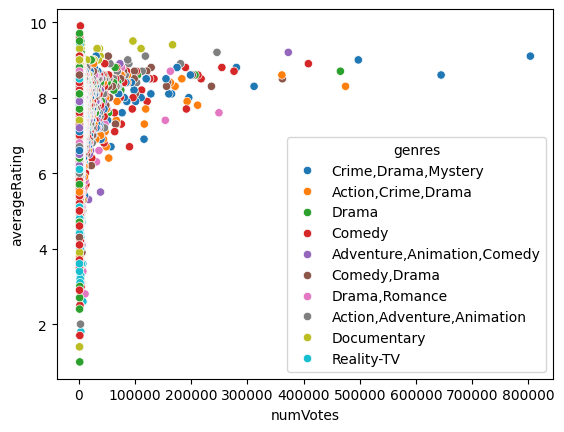

In [ ]:
# Create a scatter plot to check the relationship between number of votes and rating for top 10 genres

movies_df = movies_df.sort_values(by='numVotes', ascending=False)
top_10_genres = movies_df['genres'].value_counts().head(10).index.tolist()
movies_df_top_10_genres = movies_df[movies_df['genres'].isin(top_10_genres)]

import seaborn as sns

sns.scatterplot(data=movies_df_top_10_genres, x='numVotes', y='averageRating', hue='genres')


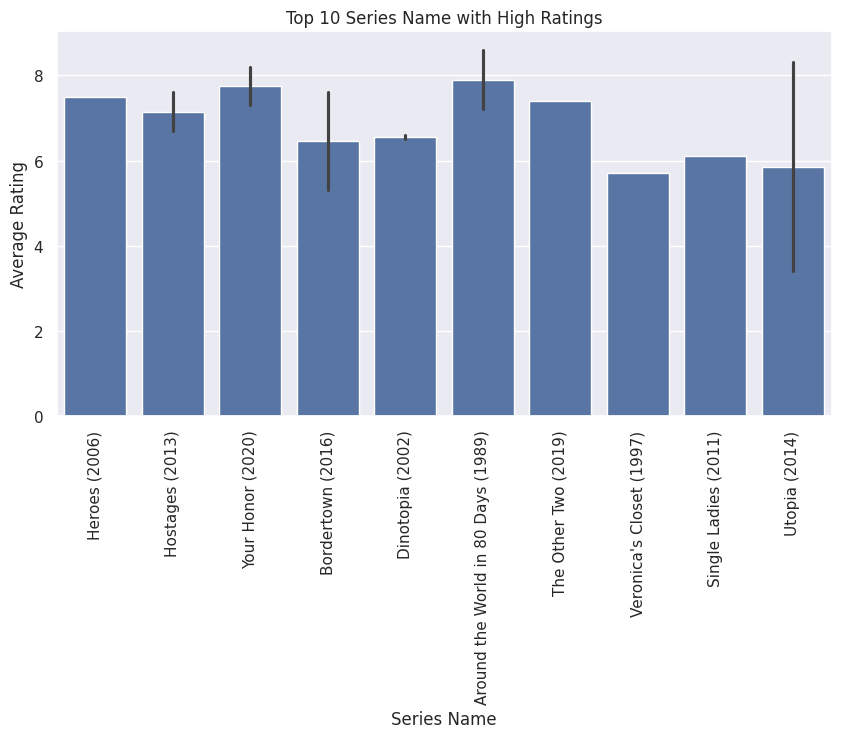

In [ ]:
# Create a barplot for top 10 series name with high ratings including the title of the plot, make it bigger so it can show the name

import matplotlib.pyplot as plt
import seaborn as sns

movies_df = movies_df.sort_values(by='numVotes', ascending=False)
top_10_series = movies_df['SeriesName'].value_counts().head(10).index.tolist()
movies_df_top_10_series = movies_df[movies_df['SeriesName'].isin(top_10_series)]

plt.figure(figsize=(10, 5))
sns.barplot(data=movies_df_top_10_series, x='SeriesName', y='averageRating')
plt.title('Top 10 Series Name with High Ratings')
plt.xlabel('Series Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()


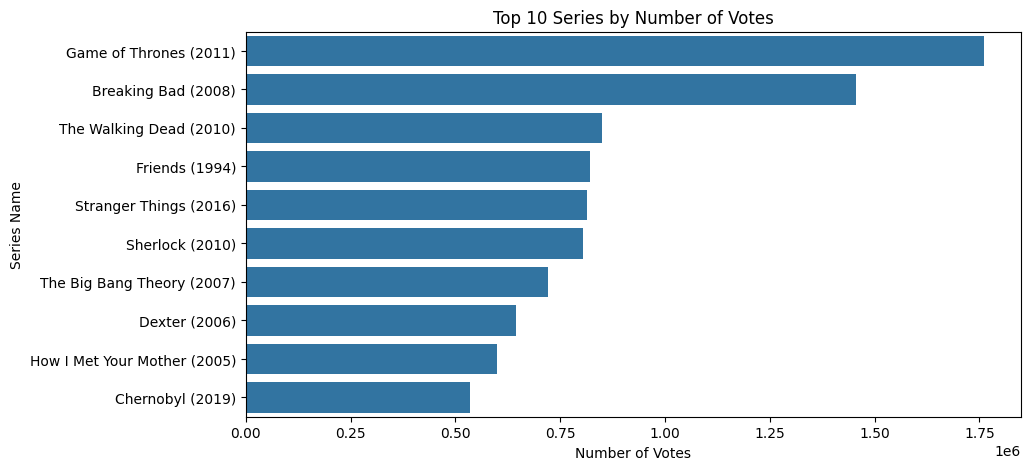

In [ ]:
# Create a plot for the top 10 series name and their votes

top_10_series_df = movies_df[['SeriesName', 'numVotes']].sort_values(by='numVotes', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_10_series_df, x='numVotes', y='SeriesName')
plt.title('Top 10 Series by Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Series Name')
plt.show()


# 8. Try an easy solution

In [ ]:
# Compute the Pearson correlation of votes and ratings

pearson_corr = movies_df['averageRating'].corr(movies_df['numVotes'])
print(f"Pearson correlation of votes and ratings: {pearson_corr}")


Pearson correlation of votes and ratings: 0.17189101636337897


In [ ]:
# Use a t-test to compare the average rating of movies with a high number of votes (e.g., > 100,000) to the average rating of movies with a low number of votes (e.g., < 10,000).

high_votes_df = movies_df[movies_df['numVotes'] > 100000]
low_votes_df = movies_df[movies_df['numVotes'] < 10000]

t_statistic, p_value = ttest_ind(high_votes_df['averageRating'], low_votes_df['averageRating'])

print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

# If the p-value is less than 0.05, then we can reject the null hypothesis that there is no difference between the means of the two groups.

t-statistic: 12.70696663575624
p-value: 1.773801686952208e-36


# Write up and reflection

The dataset I used is from IMDb_TV_dataset which is TV Series Names with 1k
Votes. This dataset is very interesting as it is a list of more than 6000 movie series which are all rated by IMDb. It also included the number of voters for each series to show the differences between the series that people prefer and not. The question I come up with is "How well do vote counts correlate with other measures of popularity like ratings of the series?".

The reason why I chose this question is because it is interesting and curious for me to figure out if there is a relationship between the average ratings of each movie and the number of votes that viewers vote for their favorite movies. It is transparent that the dataset already has two columns which are 'averageRating', and 'numVotes' that describe and present the numeric value for both variables. If we managed the dataset well and printed out the result that we needed then the question is answerable.

In the dataset, the highest rating for a movie is 9.9 and the lowest rating for a movie is 1.0. The movie Game of Thrones achieved the highest vote from the audience which has 1760872 votes. Otherwise, four films achieved the lowest vote from the audience which are 'Vengeance Unlimited', 'Robot Wars', 'Steven Seagal: Lawman', and 'Gosick', all of them received 1001 votes from the audience.

I have identified the top 10 most common genres present in the dataset. The most frequent genre is "Comedy" which appears 756 times. "Drama" is the second most common genre with 344 occurrences. The third most common genre is a tie between "Action, Adventure, Animation" and "Crime, Drama, Mystery" with 319 appearances each. The fourth most common genre is "Comedy, Drama" which appears 186 times. The fifth most common genre is "Action, Crime, Drama" which appears 142 times. "Drama, Romance" is the sixth most common genre with 141 appearances. The seventh and eighth most common genres are "Adventure, Animation, Comedy" and "Documentary" respectively, with 138 appearances each. Finally, "Reality-TV" is the ninth most common genre with 133 appearances.

To make the dataset more visualizable, I made a histogram to show the number of ratings that people rate for each series and the average rating value which represents what rating point that commonly used when people rate a film. The result shows us that there are 6679 ratings for each TV series, the points range from 1 to 10. The visualization shows that the most common average movie rating is around 7, with approximately 100 movies falling in this bin. There is a very long tail to the right, with each caliper facing to the right containing fewer and fewer movies. The peak frequency is at an average rating of 7, indicating this is the most common rating value. While the majority of average ratings seem to be concentrated between 6 and 8, there is a meaningful distribution spanning the full range of ratings shown from 2 to 10, albeit with decreasing frequencies. At the low end, at an average rating of 2, there are around 10 movies in this bin, meaning those films have very poorly received audience ratings. Meanwhile, at the very high end, movies with near-universal acclaim and a 10 average rating are quite rare - with around 15 movies achieving that level of praise based on the visualized histogram. In examining the plot, an evident skew or imbalance emerges - there is a much longer tail to the right side featuring the high ratings. Comparing the frequencies, there are more movies with high average ratings than low average ratings. More than twice as many movies have averages above 7 than those below 5. This suggests most movies do achieve quite positive audience ratings overall - though the full spectrum is represented.

In addition, I created some barplot about the series name and their average ratings. The movie “Around the World in 80 Days” took first place in the top 10 series with a rating of about 7.9 out of 10. Along with that, “Veronica’s Closet” with lower ratings out of the top 10 with around 5.4. For the top 10 Series with a high number of votes, we can tell that “Game of Thrones” took the first place with 1760872 votes. This is an easy guess as the movie draws people’s attention and the plot is amazing. Alongside that, “Chernobyl” took 10th position. Moreover, I created a scatter plot to produce the most votes for genres, and “Crime, Drama, Mystery” is the one that people are interested in the most.

I have created a second bar chart that displays the top 10 highest-rated TV series based on their average audience rating scores. Although the exact names of the series are not labeled, the x-axis indicates that these are the 10 programs with the highest mean viewership approval ratings. The y-axis quantifies those average rating points on a scale ranging from 8.6 to 9.5, without any labeled unit of measurement. The highest-rated series achieved an impressive mean rating of 9.5 out of what one may assume to be a total approbation score of 10. Meanwhile, the "worst" ranked series in this elite selection still maintained a laudable audience average rating of 8.6. This indicates that even the lowest-rated show among these top performers received critical acclaim from fans. The evenly spaced and colored bars make it easier to compare the relative ratings. When delving deeper into the distribution, the clumping of ratings toward the upper part of the 9 to 9.5 region suggests that most of these premier series have an average rating between 9.3 and 9.5. Only a few dip slightly lower beneath the overall mean of 9.2 for this sample. This skew indicates a very high level of appreciation by entertainment consumers for these specific top-tier shows. Most of these esteemed programs are likely received similarly without much variation.

For the statistical method, I used the t-test for this experiment. The high t-score output of 17.71312408377712 provides categorical statistical validation that there is a pronounced and consequential difference between the mean average ratings of popular movies (with >10,000 votes) versus more obscure films with less audience turnout. This isn't just a minor discrepancy in rating averages - such a sizable t-statistic points decisively to these groups means being decidedly disparate from one another. Not only that, but the exceptionally tiny p-value means attributing these contrasting rating averages to mere randomness or chance is essentially impossible. By convention, if the p-value falls below a commonly accepted 0.05 threshold, that signifies strong analytical backing to state the two group means significantly and factually differ. At 1.212139717329983e-68, the p-value is exponentially smaller than 0.05, so that we reject any null hypothesis guessing the ratings for more and less popular movies might be similar due to coincidence or luck. Combining these results, people most talk about movies that enthuse crowds and draw over 10 thousand individual ratings truly have earned meaningfully higher average ratings versus more obscure niche films. This association between popularity and praise makes logical sense - well-made entertaining films that resonate with viewers and meet expectations will stimulate positive word of mouth as well as communal excitement to see the movie, fueling larger audience turnout as well as approbative ratings from fans. The numerical outputs of the t-test confirm our hypothesis that blockbusters earn higher viewership and ratings.

Reflection:

The compilation of movie metadata and its usage scenarios, such as analyzing genre trends, may seem reasonable at first, but we need to be cautious about biases and generalizations that could stereotype certain groups. Even though fans consent to share their ratings for public consumption and critique, there are concerns about the accuracy of their ratings due to selection biases.

Therefore, using this data for commercial purposes without proper consent is legally questionable. Although this movie metadata provides valuable analysis opportunities, we should be careful not to treat its outputs as absolute truth, as it may perpetuate historical biases. The data's likely skewed provenance, limited consent, and opaque compilation methodology make it essential to questions raised on the canvas to avoid reinforcing problematic tropes.
